In [1]:
#importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
#importing config.yaml and loading the raw dataset

import yaml

with open(r"C:\Users\bhuva\Desktop\Alziemer\config.yaml", "r") as f:
    config = yaml.safe_load(f)


# Loading the dataset
df = pd.read_csv(config["data_path"])
print("Dataset loaded")

Dataset loaded


In [4]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor,Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        74283 non-null  object 
 1   Age                            74283 non-null  int64  
 2   Gender                         74283 non-null  object 
 3   Education Level                74283 non-null  int64  
 4   BMI                            74283 non-null  float64
 5   Physical Activity Level        74283 non-null  object 
 6   Smoking Status                 74283 non-null  object 
 7   Alcohol Consumption            74283 non-null  object 
 8   Diabetes                       74283 non-null  object 
 9   Hypertension                   74283 non-null  object 
 10  Cholesterol Level              74283 non-null  object 
 11  Family History of Alzheimer’s  74283 non-null  object 
 12  Cognitive Test Score           74283 non-null 

In [6]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


## Distribution of Alzheimer Diagnosis
**Visualization:** Bar chart of "Alzheimer's Diagnosis Category" counts.

Alzheimer Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64


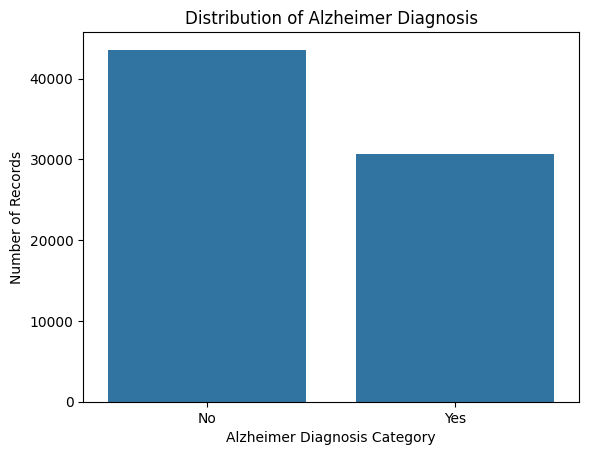

In [7]:
target_counts = df[config["target_variable"]].value_counts()
print(target_counts)

sns.barplot(x=target_counts.index, y=target_counts.values,)
plt.title('Distribution of Alzheimer Diagnosis')
plt.xlabel('Alzheimer Diagnosis Category')
plt.ylabel('Number of Records')
plt.show()



**Observations:**

- The dataset contains two classes for the target variable: "No" (No Alzheimer's diagnosis) and "Yes" (Alzheimer's diagnosis).
- There is a clear class imbalance in the target variable.
- The "No" category is significantly more frequent than the "Yes" category.
- 43570 records are classified as "No" Alzheimer's diagnosis.
- 30713 records are classified as "Yes" Alzheimer's diagnosis.
- The "No" class represents roughly 58% of the dataset, while the "Yes" class represents approximately 42%


------------------------------------------------ ** ---------------------------------------------

## Distribution of Numerical data

**Visualization:** Histogram with KDE plot for BMI.

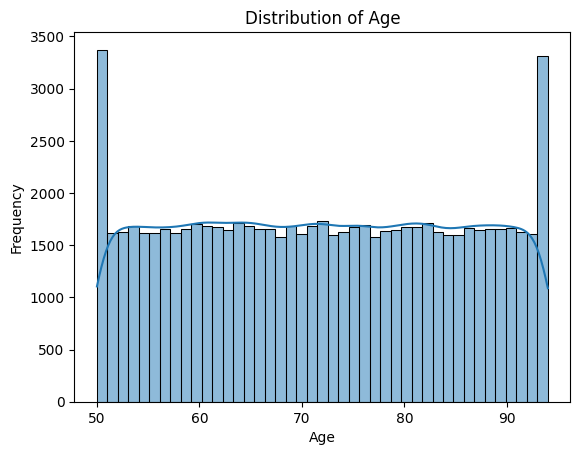

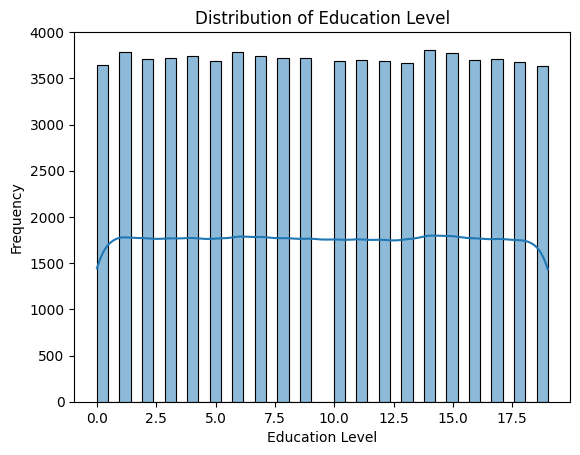

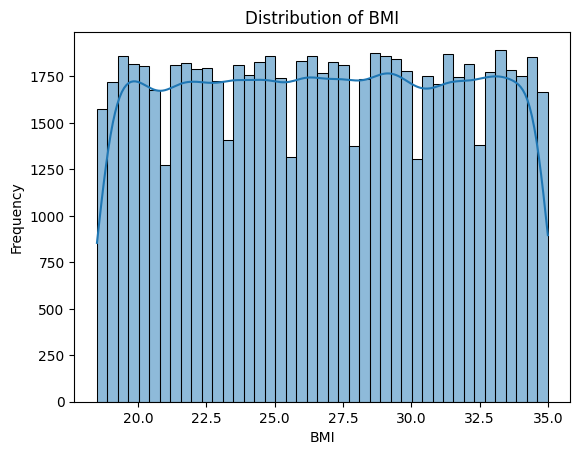

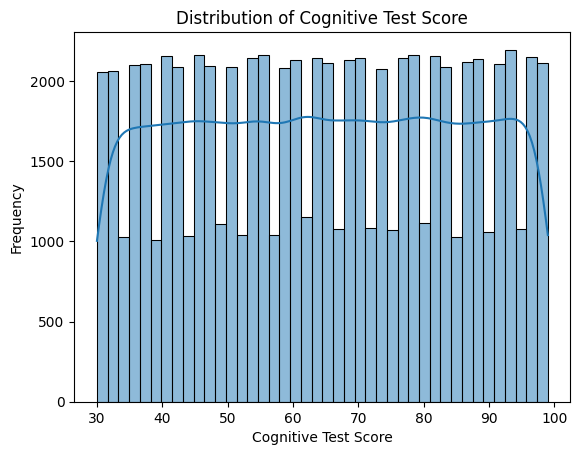

In [8]:
#numerical features distribution
numerical_features = config["numerical_features"]

#histogram plots
for feature in numerical_features:
    sns.histplot(df[feature], kde=True) 
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### Distribution of BMI (Body Mass Index)

**Observations:**
- The distribution of BMI appears to be relatively **uniform** or **slightly multi-modal**.
- It spans a range from **18.5 to 35**.
- The frequency of records is consistent across this BMI range, with minor fluctuations.
- there is no Extreme Skewness.
- The KDE (Kernel Density Estimate) plot overlayed on the histogram shows a relatively flat curve with minor bumps.


### Distribution of Age

**Observations:**
- The distribution of Age is **not normal** and exhibits a **distinct U-shape**.
- There are prominent peaks at the **lower end** of the age range of 50 years and at the **upper end** of 94 years.
- The frequency is lower in the middle age ranges of 60s, 70s, 80s.
- The age range spans from **50 to 94 years**.
- The KDE plot reflects this U-shape, showing peaks at the ends and a dip in the middle.


### Distribution of Cognitive Test Score

**Observations:**
- The distribution of Cognitive Test Score is **not normal** and appears somewhat **plateau-like** across a range of scores.
- The scores range approximately from **30 to 100**.
- There seems to be a relatively high frequency of scores in the middle to upper range (roughly 40 to 90), with some fluctuations and perhaps clustering at certain score values.
- The frequency seems to taper off at lower Cognitive Test Scores closer to 30.
- The KDE plot shows a somewhat bumpy curve, reflecting the plateau-like nature of the distribution.


### Distribution of Education Level

**Observations:**
- The distribution of Education Level is **discrete**, with integer values from **0 to 19**.
- The distribution is relatively **uniform** across these education levels, with frequencies being somewhat similar for each level.
- There might be slight peaks or higher frequencies at certain education levels, but overall, it's fairly evenly distributed across the range.
- The histogram shows distinct bars for each integer Education Level value. The KDE plot smooths this out, but the underlying discrete nature is evident from the histogram bars.

## boxplots

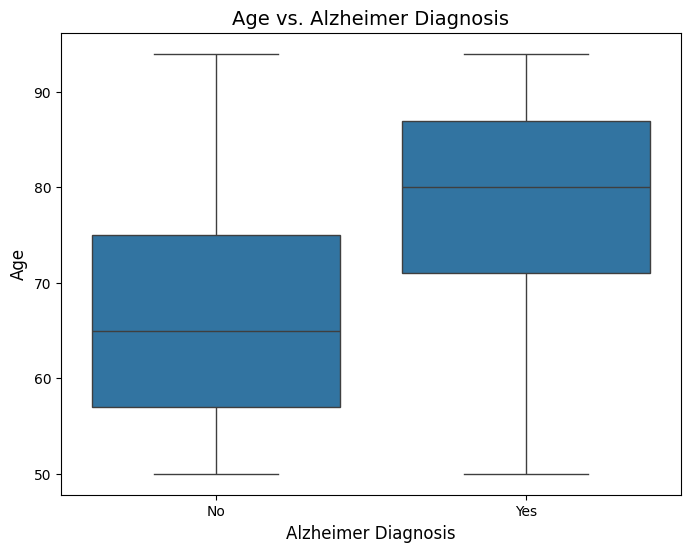

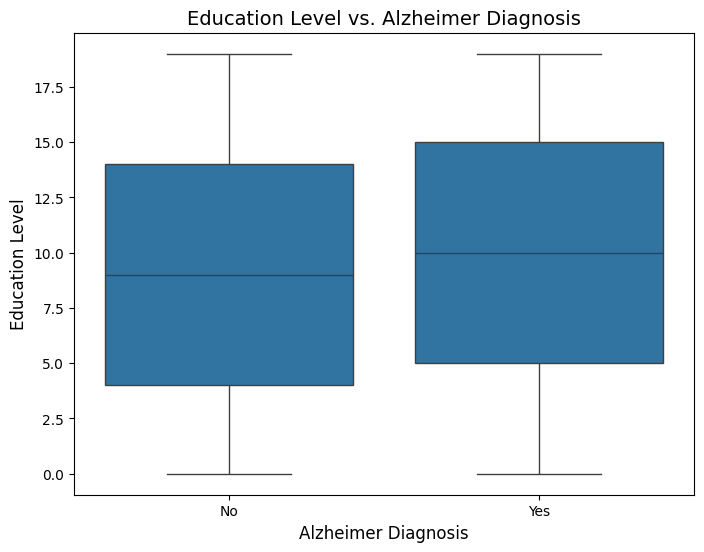

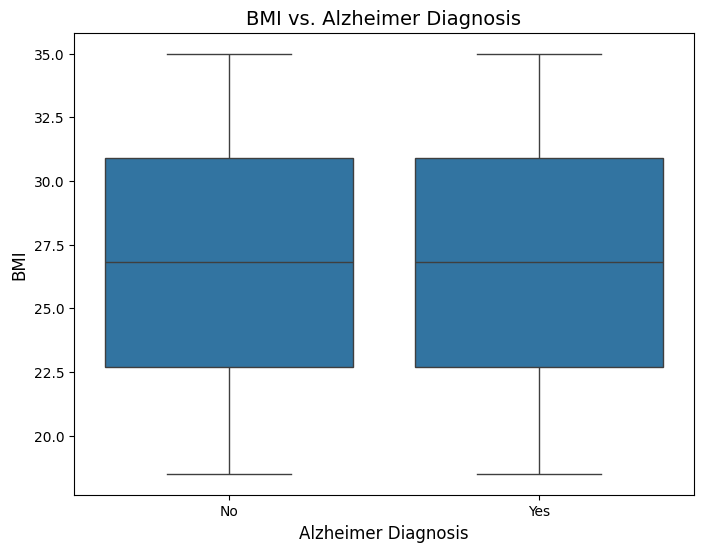

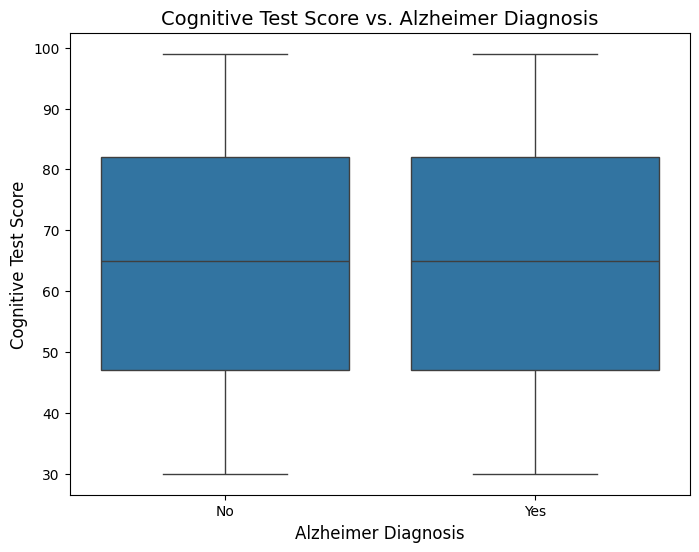

In [9]:
#boxlplots
target_column = config["target_variable"]
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_column, y=feature, data=df)
    plt.title(f'{feature} vs. {target_column}', fontsize=14)
    plt.xlabel(target_column, fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.show()

### Cognitive Test Score vs. Alzheimer Diagnosis

**Observations:**
- There is a noticeable difference in the distribution of Cognitive Test Score between the "No" and "Yes" Alzheimer Diagnosis groups.
- **Median:** The median Cognitive Test Score for the "Yes" group appears to be **lower** than the median Cognitive Test Score for the "No" group.
- **Box Position:** The entire box for the "Yes" group is positioned somewhat **lower** on the y-axis compared to the "No" group's box.
- **Overlap:** There is some overlap between the boxes, indicating that Cognitive Test Scores alone are not perfectly separating the two groups, but there's a clear tendency for lower scores to be associated with "Yes" diagnosis.
- **Spread (IQR):** The spread of Cognitive Test Scores (as indicated by the box size - IQR) seems to be somewhat similar for both "No" and "Yes" groups.
- Lower Cognitive Test Scores tend to be associated with a higher likelihood of Alzheimer's diagnosis in this dataset


### BMI (Body Mass Index) vs. Alzheimer Diagnosis

**Observations:**
- Visually, there appears to be **very little difference** in the distribution of BMI between the "No" and "Yes" Alzheimer Diagnosis groups.
- **Median:** The medians for both groups are very close to each other and positioned around the same BMI value.
- **Box Position and Size:** The boxes for "No" and "Yes" groups largely overlap and are in very similar vertical positions.
- **Spread (IQR) and Whiskers:** The overall spread and range of BMI values, as represented by the boxes and whiskers, seem quite comparable between the two groups.
- Based on this box plot, BMI does not seem to be a strong discriminator between individuals with and without Alzheimer's diagnosis in this dataset.


### BMI (Body Mass Index) vs. Alzheimer Diagnosis

**Observations:**
- Visually, there appears to be **very little difference** in the distribution of BMI between the "No" and "Yes" Alzheimer Diagnosis groups.
- **Median:** The medians for both groups are very close to each other and positioned around the same BMI value.
- **Box Position and Size:** The boxes for "No" and "Yes" groups largely overlap and are in very similar vertical positions.
- **Spread (IQR) and Whiskers:** The overall spread and range of BMI values, as represented by the boxes and whiskers, seem quite comparable between the two groups.
-Based on this box plot, BMI does not seem to be a strong discriminator between individuals with and without Alzheimer's diagnosis in this dataset


### Age vs. Alzheimer Diagnosis

**Observations:**
- There is a noticeable difference in the distribution of Age between the "No" and "Yes" Alzheimer Diagnosis groups.
- **Median:** The median Age for the "Yes" group (Alzheimer's diagnosis) is visibly **higher** than the median Age for the "No" group.
- **Box Position:** The box for the "Yes" group is positioned noticeably **higher** on the y-axis compared to the "No" group's box.
- **Overlap:**  There is some overlap between the boxes, but the "Yes" group's age distribution is shifted towards older ages compared to the "No" group.
- **Spread (IQR):** The spread of ages (box size) might be slightly larger for the "Yes" group, but the main difference is in the central tendency (median and box position).
- Older age tends to be associated with a higher likelihood of Alzheimer's diagnosis in this dataset. This is consistent with the known strong association between increasing age and Alzheimer's disease risk.


### Education Level vs. Alzheimer Diagnosis

**Observations:**
- There is a subtle difference in the distribution of Education Level between the "No" and "Yes" Alzheimer Diagnosis groups, though it's less pronounced than for Cognitive Test Score or Age.
- **Median:** The median Education Level for the "Yes" group (Alzheimer's diagnosis) appears to be slightly **lower** than the median for the "No" group.
- **Box Position:** The box for the "Yes" group is positioned slightly **lower** on the y-axis, but the boxes are quite close.
- **Overlap:** There is significant overlap between the boxes, indicating that Education Level alone is not a strong separator, but there is a tendency towards lower education levels in the "Yes" group.
- **Spread (IQR):** The spread of Education Levels seems somewhat similar for both groups.
- Lower Education Level might be weakly associated with a slightly higher likelihood of Alzheimer's diagnosis in this dataset

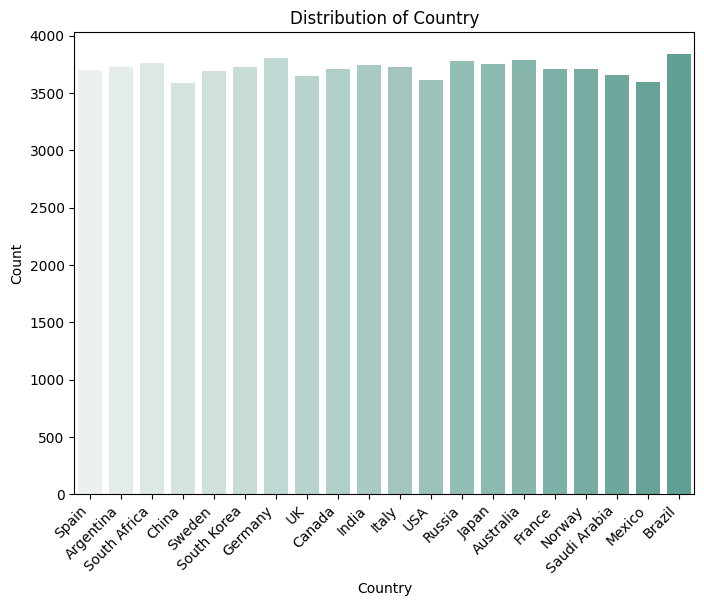

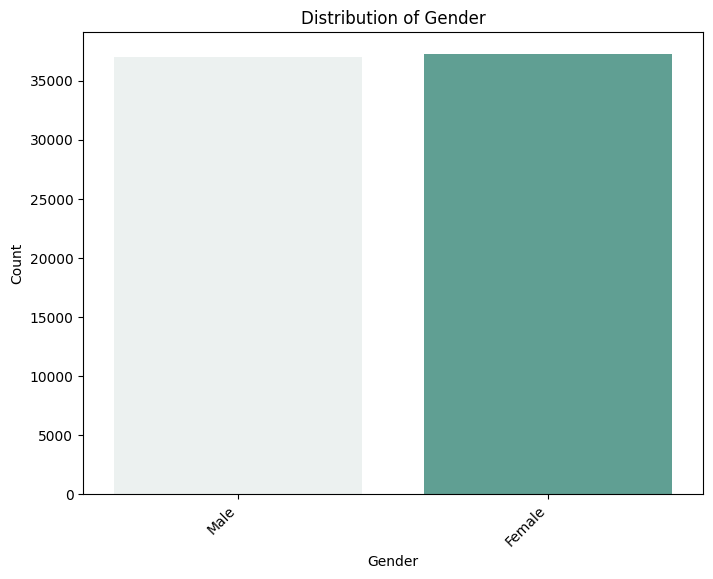

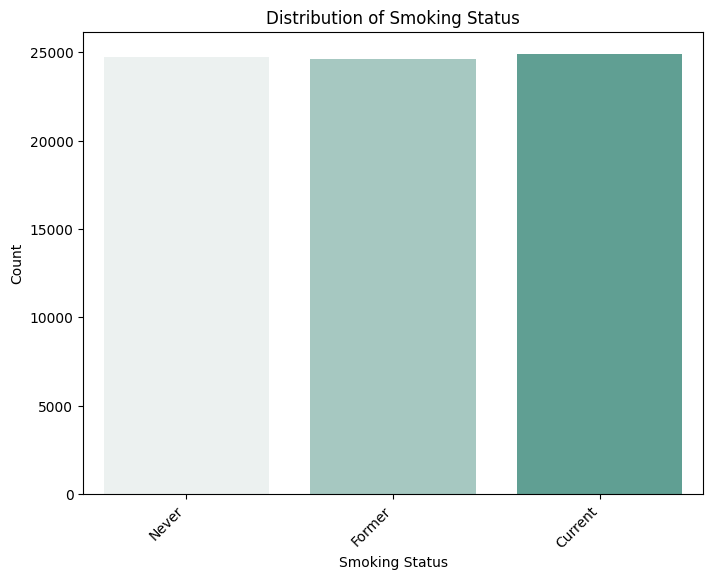

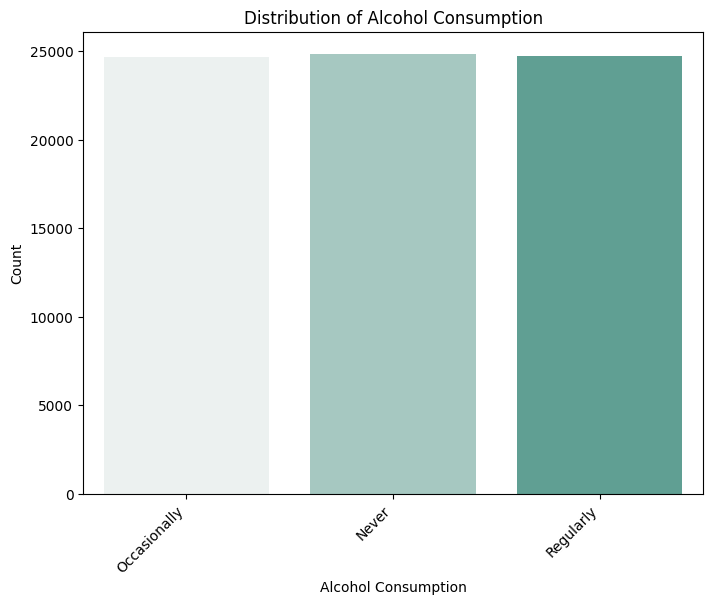

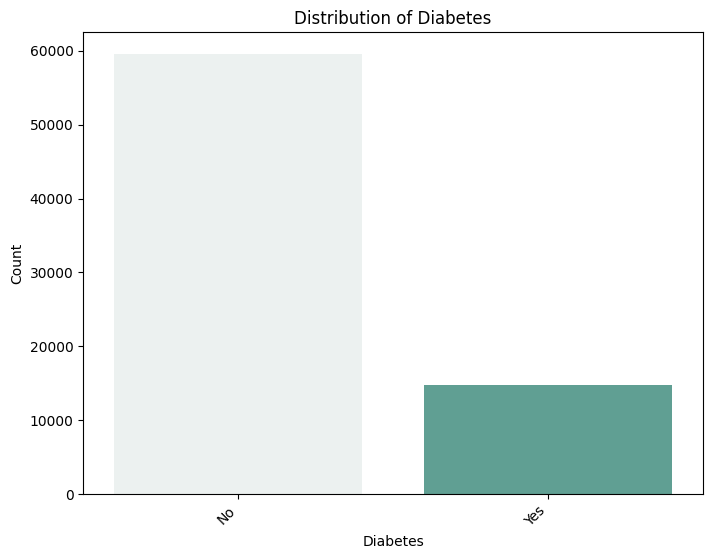

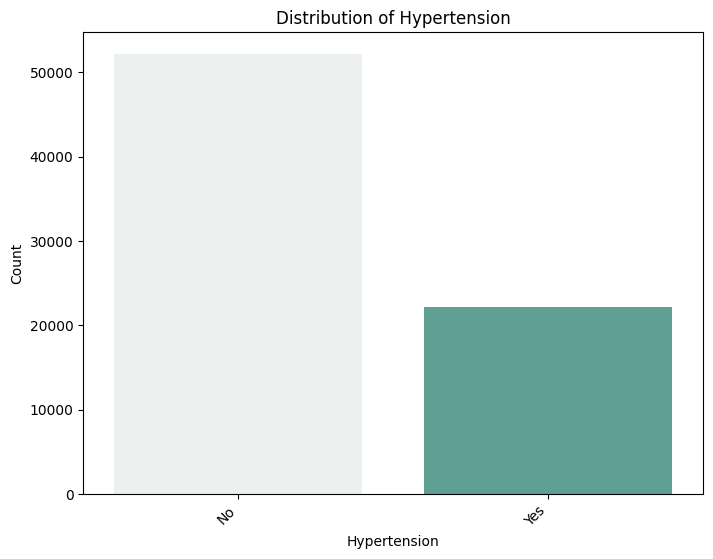

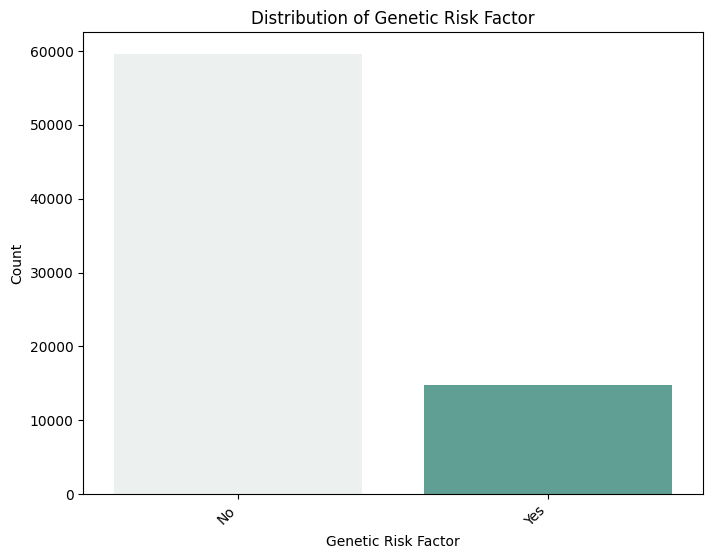

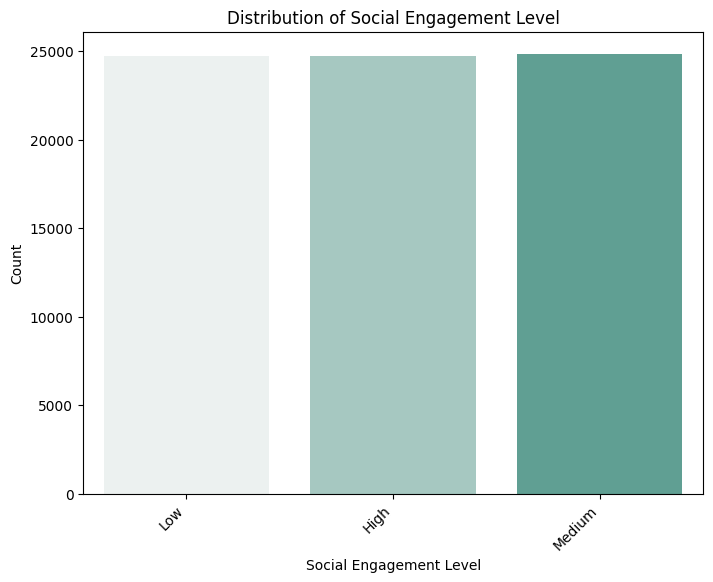

In [10]:
#categorical features

categorical_features = config["categorical_features"]

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df, palette="light:#5A9") 
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') 
    plt.show()

## correlation matrix

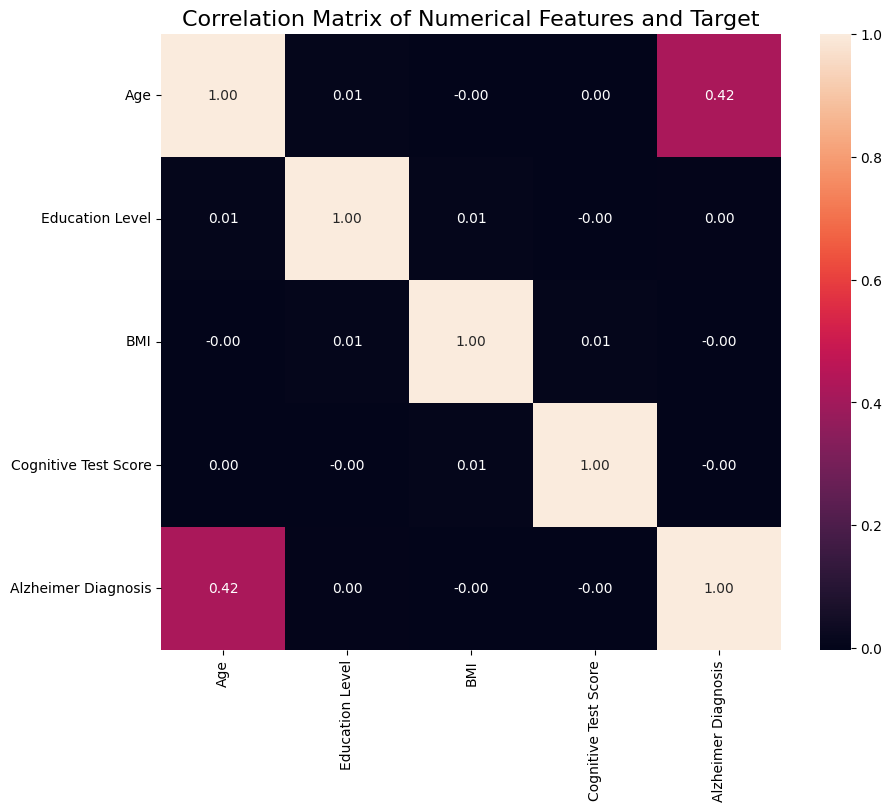

In [11]:
df[target_column] = df[target_column].map({'Yes': 1, 'No': 0})
correlation_matrix = df[numerical_features + [target_column]].corr() # Include target for correlation with numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f") # annot=True for values, fmt=".2f" for 2 decimal places
plt.title('Correlation Matrix of Numerical Features and Target', fontsize=16)
plt.show()

In [15]:
correlation_matrix

,Age,Education Level,BMI,Cognitive Test Score,Alzheimer Diagnosis
Age,1.000000,0.006511,-0.000135,0.000049,0.419923
Education Level,0.006511,1.000000,0.005444,-0.002519,0.003732
BMI,-0.000135,0.005444,1.000000,0.005538,-0.001703
Cognitive Test Score,0.000049,-0.002519,0.005538,1.000000,-0.001142
Alzheimer Diagnosis,0.419923,0.003732,-0.001703,-0.001142,1.000000


- **Age** is the most linearly correlated numerical feature with Alzheimer's Diagnosis. It shows a moderate positive correlation (0.42), indicating that as age increases, the likelihood of an Alzheimer's diagnosis tends to increase linearly. This makes Age a potentially important predictor based on linear relationships.

- **Education Level**, **BMI**, and **Cognitive Test Score** show essentially no linear correlation with Alzheimer's Diagnosis. Their correlation coefficients are very close to zero.

- Low Linear Correlation Doesn't Mean Unimportant: It's crucial to remember that correlation measures linear relationships. The near-zero linear correlations for **Education Level**, **BMI**, and **Cognitive Test Score** do not necessarily mean these features are irrelevant for predicting Alzheimer's. There are a few key reasons for this: